In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [96]:
hous=pd.read_csv('kc_house_data.csv')

In [54]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

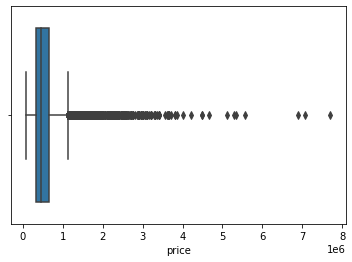

In [18]:
sns.boxplot(hous['price'],data=hous)

In [44]:
hous.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [132]:
hous['date']=pd.to_datetime(hous['date'])

In [27]:
hous['price']=hous['price'].astype('int64').to_frame()

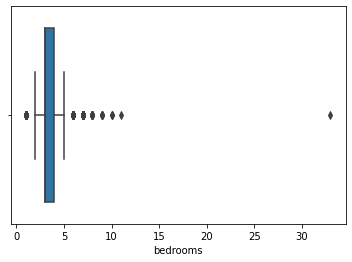

In [50]:
sns.boxplot(hous.bedrooms,data=hous)

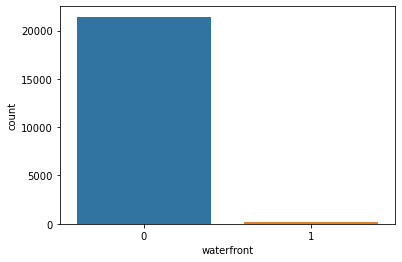

In [48]:
sns.countplot(hous.waterfront)

In [56]:
hous['waterfront'].value_counts()/len(hous['waterfront'])*100

0    99.245266
1     0.754734
Name: waterfront, dtype: float64

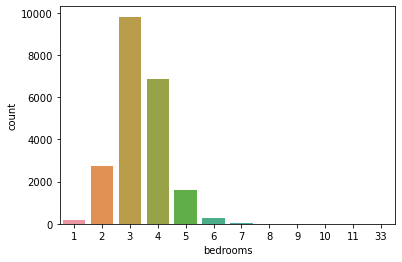

In [58]:
sns.countplot(hous['bedrooms'])

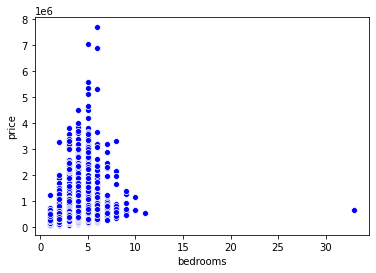

In [64]:
sns.scatterplot(x='bedrooms',y='price',color='b',data=hous)

In [100]:
X=hous.drop(['date','id'],axis=1).values

In [98]:
y=hous['price'].values

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sd=StandardScaler()

In [107]:
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression

In [115]:
lr=LinearRegression()

In [116]:
lr.fit(X_train,y_train)

LinearRegression()

In [117]:
X_train_pred=lr.predict(X_train)

In [122]:
from sklearn.metrics import r2_score,mean_absolute_error

In [126]:
mean_absolute_error(X_train_pred,y_train)

5.903358823144973e-10

In [127]:
preds=lr.predict(X_test)

In [128]:
mean_absolute_error(preds,y_test)

5.856966226143233e-10

# pratice

In [176]:
ads=pd.read_csv('advertising.csv')

In [177]:
ads.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [146]:
ads['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [178]:
ads['Timestamp']=pd.to_datetime(ads['Timestamp'])

In [179]:
ads['year']=ads['Timestamp'].dt.year

In [180]:
ads['year'].unique()

array([2016], dtype=int64)

In [181]:
ads['month']=ads['Timestamp'].dt.month

In [182]:
ads['month'].value_counts()

2    160
3    156
5    147
4    147
1    147
6    142
7    101
Name: month, dtype: int64

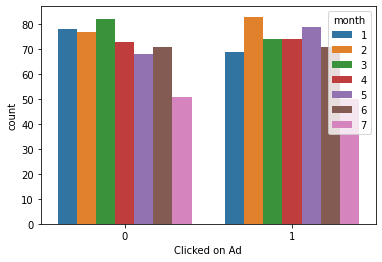

In [161]:
sns.countplot(ads['Clicked on Ad'],data=hous,hue=ads['month'])

In [167]:
ads['Daily Time Spent on Site'].dtype

dtype('int64')

In [166]:
ads['Daily Time Spent on Site']=pd.to_numeric(ads['Daily Time Spent on Site'])

In [183]:
ads=ads.drop(['Ad Topic Line','Country','Timestamp','year','City'],axis=1)

In [184]:
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,month
0,68.95,35,61833.90,256.09,0,0,3
1,80.23,31,68441.85,193.77,1,0,4
2,69.47,26,59785.94,236.50,0,0,3
3,74.15,29,54806.18,245.89,1,0,1
4,68.37,35,73889.99,225.58,0,0,6


In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
mn=MinMaxScaler()

In [190]:
X=ads.drop('Clicked on Ad',axis=1)
y=ads['Clicked on Ad']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=20)

In [192]:
X_train=mn.fit_transform(X_train)
X_test=mn.transform(X_test)

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
lr=LogisticRegression()

In [195]:
lr.fit(X_train,y_train)

LogisticRegression()

In [196]:
X_train_preds=lr.predict(X_train)

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [198]:
accuracy_score(y_train,X_train_preds)

0.96625

In [199]:
preds=lr.predict(X_test)

In [200]:
accuracy_score(preds,y_test)

0.98

In [201]:
confusion_matrix(preds,y_test)

array([[110,   3],
       [  1,  86]], dtype=int64)

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [212]:
knn=KNeighborsClassifier(n_neighbors=5)

In [213]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [214]:
X_train_preds=knn.predict(X_train)

In [215]:
accuracy_score(X_train_preds,y_train)

0.96875

In [216]:
preds=knn.predict(X_test)

In [217]:
accuracy_score(preds,y_test)

0.985

In [223]:
from sklearn.naive_bayes import GaussianNB

In [224]:
gb=GaussianNB()

In [225]:
gb.fit(X_train,y_train)

GaussianNB()

In [226]:
x_preds=gb.predict(X_train)

In [227]:
accuracy_score(x_preds,y_train)

0.96875

In [228]:
preds=gb.predict(X_test)

In [229]:
accuracy_score(preds,y_test)

0.97

# Clustering

In [2]:
cred=pd.read_csv('CC GENERAL.csv')

In [3]:
cred.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
cred.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [4]:
from feature_engine.missing_data_imputers import MeanMedianImputer

In [5]:
mn=MeanMedianImputer(imputation_method='mean',variables=['CREDIT_LIMIT','MINIMUM_PAYMENTS'])

In [6]:
cred=mn.fit_transform(cred)

In [17]:
cred.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


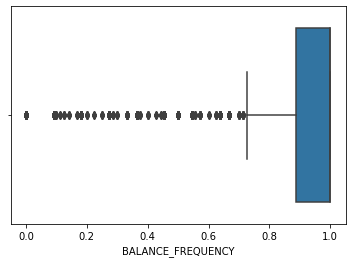

In [20]:
sns.boxplot(cred['BALANCE_FREQUENCY'])

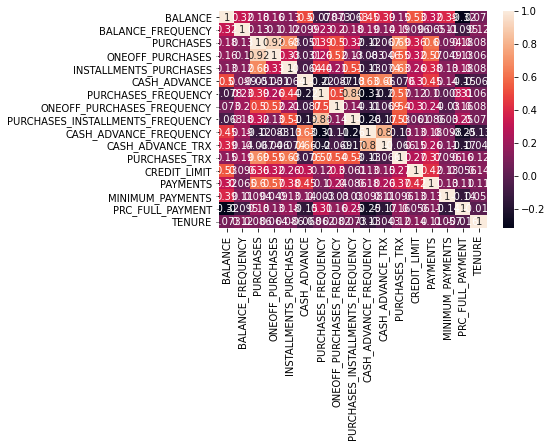

<Figure size 720x720 with 0 Axes>

In [29]:
sns.heatmap(cred.corr(),annot=True)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

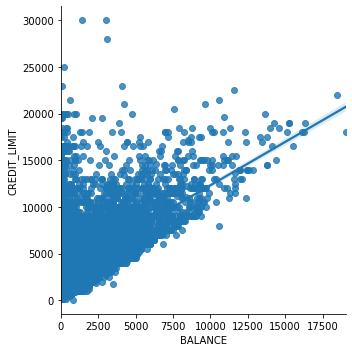

In [33]:
sns.lmplot(x='BALANCE',y='CREDIT_LIMIT',data=cred)

In [41]:
cred[cred['BALANCE']>=8500].head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
30,C10031,12136.219960,1.0,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.000000,12
90,C10095,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12
120,C10125,8504.876253,1.0,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.000000,12
124,C10130,14224.115410,1.0,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.000000,12
128,C10134,11167.234030,1.0,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.000000,12
133,C10139,9354.060450,1.0,796.33,796.33,0.00,13748.471310,0.083333,0.083333,0.000000,0.666667,16,1,13000.0,10664.658660,2600.875721,0.083333,12
138,C10144,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
143,C10149,10598.467770,1.0,2084.48,1300.48,784.00,0.000000,0.666667,0.416667,0.583333,0.000000,0,13,21500.0,3219.621433,3068.125648,0.000000,12
153,C10159,13673.079610,1.0,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
174,C10180,11972.011040,1.0,5715.00,4685.54,1029.46,1626.351366,1.000000,1.000000,1.000000,0.166667,3,90,14000.0,4639.513745,3192.306018,0.000000,12


In [9]:
cred1=cred[['CREDIT_LIMIT','PAYMENTS']]

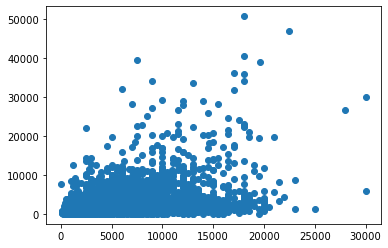

In [135]:
cred1.head()
plt.scatter(cred1['CREDIT_LIMIT'],cred1['PAYMENTS'])

In [10]:
cred1.shape

(8950, 2)

In [11]:
from sklearn.cluster import KMeans

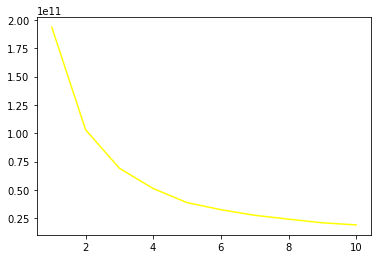

In [12]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=35)
    kmean.fit(cred1)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss,color='yellow')    
    

In [13]:
ki=KMeans(n_clusters=3,init='k-means++',random_state=30)

In [14]:
ki.fit(cred1)

KMeans(n_clusters=3, random_state=30)

In [15]:
y_clus=ki.predict(cred1)

In [16]:
y_clus

array([1, 0, 0, ..., 1, 1, 1])

In [17]:
cred1.head()

,CREDIT_LIMIT,PAYMENTS
0,1000.0,201.802084
1,7000.0,4103.032597
2,7500.0,622.066742
3,7500.0,0.000000
4,1200.0,678.334763


In [85]:
cred1.iloc[y_clus==2,1]

1        7000.0
2        7500.0
3        7500.0
8        7000.0
9       11000.0
         ...   
8774     9000.0
8804     5000.0
8813     7000.0
8839     5000.0
8857    10000.0
Name: CREDIT_LIMIT, Length: 2676, dtype: float64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

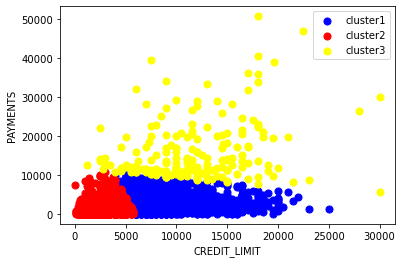

In [144]:
plt.scatter(cred1.iloc[y_clus==0,0],cred1.iloc[y_clus==0,1],color='blue',s=50,label='cluster1')
plt.scatter(cred1.iloc[y_clus==1,0],cred1.iloc[y_clus==1,1],color='red',s=50,label='cluster2')
plt.scatter(cred1.iloc[y_clus==2,0],cred1.iloc[y_clus==2,1],color='yellow',s=50,label='cluster3')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PAYMENTS')
plt.legend(loc=1)
plt.tight_layout

# heirachical clustering

In [8]:
from scipy.cluster import hierarchy as sh

Text(0, 0.5, 'Euclidean_distance')

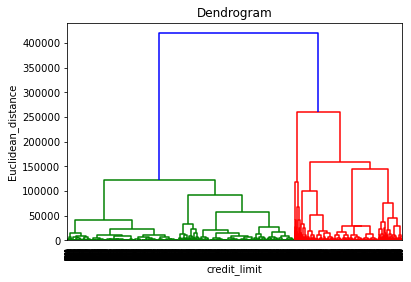

In [18]:
sh.dendrogram(sh.linkage(cred1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('credit_limit')
plt.ylabel('Euclidean_distance')

In [27]:
from sklearn.cluster import DBSCAN,AgglomerativeClustering

In [28]:
db=DBSCAN(eps=0.8,min_samples=4)

In [43]:
ag=AgglomerativeClustering(n_clusters=2)

In [45]:
y=ag.fit_predict(cred1)

In [46]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

Text(0, 0.5, 'payments')

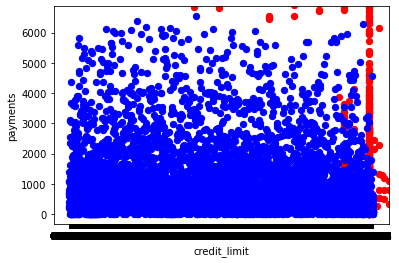

In [47]:
plt.scatter(cred1.iloc[y==0,0],cred1.iloc[y==0,1],s=40,color='red')
plt.scatter(cred.iloc[y==1,0],cred1.iloc[y==1,1],s=40,color='blue')
plt.xlabel('credit_limit')
plt.ylabel('payments')